In [1]:
import keras
import tensorflow as tf




In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def ShowMeArray(tab):
    for i in range(len(tab)):
        for d in tab[i]:
            print(str(d)+'   ', end='')
        print('')

In [4]:
ShowMeArray(x_train[0])

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18   18   18   126   136   175   26   166   255   247   127   0   0   0   0   
0   0   0   0   0   0   0   0   30   36   94   154   170   253   253   253   253   253   225   172   253   242   195   64   0   0   0   0   
0   0   0   0   0   0   0   49   238   253   253   253   253   253   253   253   253   251   93   82   82   56   39   0   0   0   0   0   
0   0   0   0   0   0   

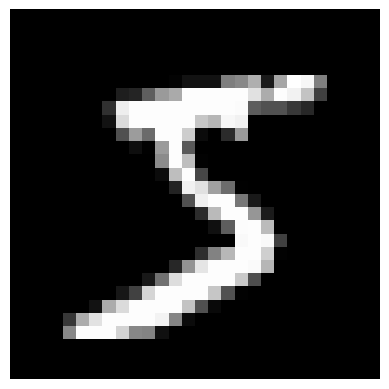

In [5]:
import matplotlib.pyplot as plt
index = 0
plt.imshow(x_train[index].reshape(28,28), cmap='gray')
plt.axis('off');

In [6]:
x_train.shape, len(y_train), len(y_test), y_test

((60000, 28, 28), 60000, 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [7]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(85,activation ='relu', input_shape=(784,))) #Hmm, now i add new layer and increase sum of neurons and result is better ## when i reverse num of neurons its give me much better accuracy
model.add(layers.Dense(75, activation ='relu', input_shape=(784,)))# difference between accuracy without this layer just 0.0031, but our graphs look much better
model.add(layers.Dense(55, activation ='relu', input_shape=(784,)))
model.add(layers.Dense(45, activation ='relu', input_shape=(784,)))
model.add(layers.Dense(30, activation ='relu', input_shape=(784,)))
model.add(layers.Dense(15, activation ='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation ='softmax'))
# wiecej warst, layerow
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs=9,validation_split=0.2)

Epoch 1/9
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4109 - accuracy: 0.8811 - val_loss: 0.2113 - val_accuracy: 0.9399
Epoch 2/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1562 - accuracy: 0.9556 - val_loss: 0.1288 - val_accuracy: 0.9650
Epoch 3/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1154 - accuracy: 0.9688 - val_loss: 0.1415 - val_accuracy: 0.9611
Epoch 4/9
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0962 - accuracy: 0.9737 - val_loss: 0.1381 - val_accuracy: 0.9638
Epoch 5/9
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0827 - accuracy: 0.9768 - val_loss: 0.1330 - val_accuracy: 0.9692
Epoch 6/9
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0712 - accuracy: 0.9810 - val_loss: 0.1396 - val_accuracy: 0.9707
Epoch 7/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9830 - val_loss: 0.1624 - val_accuracy: 0.9669

In [10]:
model.save('my_model.keras')

In [12]:
test_loss, test_metr = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1313 - accuracy: 0.9726


In [13]:
print('test_acc:', test_metr)

test_acc: 0.972599983215332


In [14]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [58]:
# how to find a erros:
# import numpy as np
# klasy = np.argmax(y_pred, axis = 1)
# np.unique(klasy == np.argmax(y_test,axis = 1), return_index = True, return_counts = True)
# l  = []
# for i in range(1000):
#   if (klasy[i] != np.argmax(y_test,axis = 1)[i]):
#     l.append(i)
#     print('Sklasyfikowane:',klasy[i],'Etyketa:', np.argmax(y_test, axis = 1)[i], 'i:', i)
#     plt.imshow(x_test[i].reshape(28,28))
#     # plt.show()
# len(l)

In [76]:
from google.colab import files

uploaded = files.upload()

Saving 3_hand.jpg to 3_hand (2).jpg


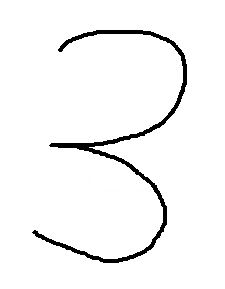

In [82]:
from PIL import Image
import IPython.display as display
img = Image.open("3_hand (2).jpg")
display.display(img)

In [83]:
import cv2
import numpy as np

#load ur image
image = cv2.imread('3_hand (2).jpg', cv2.IMREAD_GRAYSCALE)

# reshape 28x28
image = cv2.resize(image, (28, 28))
image_array = np.array(image)
image_array.shape
inverted_image = 255 - image_array


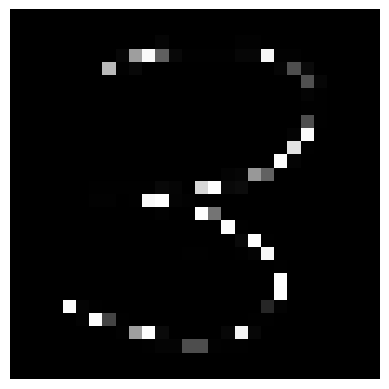

In [84]:
import matplotlib.pyplot as plt
plt.imshow(inverted_image.reshape(28,28), cmap='gray')
plt.axis('off');

In [85]:

img = inverted_image / 255.0
img = img.reshape(784)
img = img.reshape(1, -1)

In [86]:
img.shape

(1, 784)

In [87]:
y_pred = model.predict(img)

1/1 [==============================] - 0s 23ms/step


In [88]:
predicted_class = np.argmax(y_pred)
print("Prediction:", predicted_class)

Prediction: 3


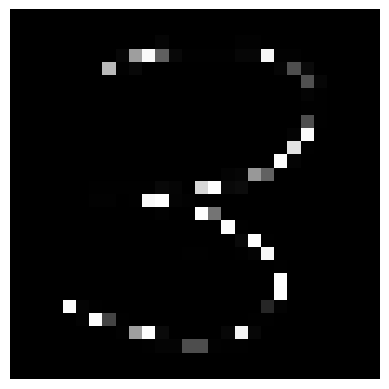

In [89]:
import matplotlib.pyplot as plt
index = 0
plt.imshow(img.reshape(28,28), cmap='gray')
plt.axis('off');

In [90]:

ShowMeArray(inverted_image)

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   2   2   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   7   158   250   95   8   1   1   1   1   6   6   246   2   2   0   0   0   0   0   0   
0   0   0   0   0   0   0   186   2   8   0   0   0   0   0   0   0   0   0   0   5   78   10   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   80   6   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   1   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   